# **Modelo de Kuramoto**

In [1]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
import matplotlib.pyplot as plt

def simulate_kuramoto(adj_sparse, omega, lambdas, dt=0.01, T=200, transient=100):
    """
    Simula o modelo de Kuramoto usando adj_sparse (scipy.sparse).
    Retorna o parâmetro de ordem médio r para cada lambda.
    """
    N = len(omega)
    theta0 = np.random.uniform(0, 2*np.pi, N)
    steps = int(T/dt)
    trans_steps = int(transient/dt)
    r_values = np.zeros_like(lambdas)

    for idx, lam in enumerate(lambdas):
        theta = theta0.copy()
        r_accum = 0.0
        count   = 0
        for step in range(steps):
            # seno e cosseno atuais
            s = np.sin(theta)
            c = np.cos(theta)
            # soma esparsa
            sum_s = adj_sparse.dot(s)
            sum_c = adj_sparse.dot(c)
            # acoplamento
            coupling = lam*(c*sum_s - s*sum_c)
            # Euler explícito
            theta += dt*(omega + coupling)
            if step >= trans_steps:
                r_accum += np.abs(np.mean(np.exp(1j*theta)))
                count   += 1
        r_values[idx] = r_accum / count

    return r_values


## **Questão 1: Comparação entre ER, BA e WS**

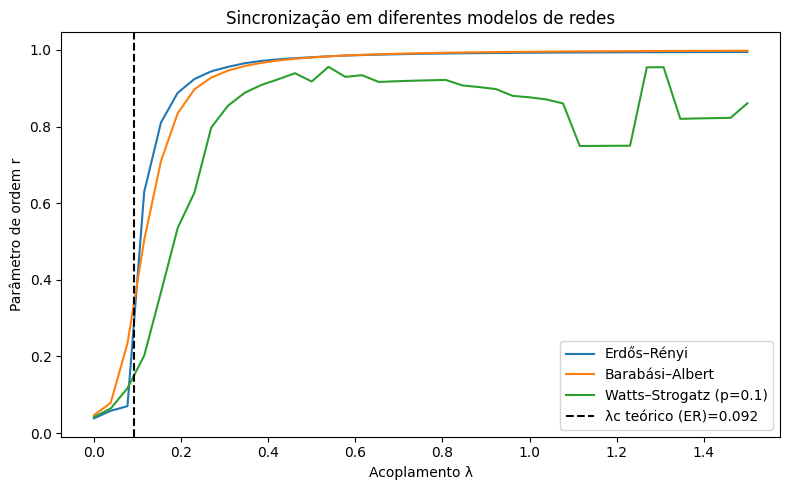

In [2]:
# Parâmetros
N = 500
avg_k = 6
lambdas = np.linspace(0, 1.5, 40)
omega   = np.random.uniform(-0.5, 0.5, N)

# Geração das redes e matrizes esparsas
p_er = avg_k/(N-1)
G_er = nx.erdos_renyi_graph(N, p_er)
G_ba = nx.barabasi_albert_graph(N, avg_k//2)
G_ws = nx.watts_strogatz_graph(N, avg_k, p=0.1)

A_er = sp.csr_matrix(nx.to_scipy_sparse_array(G_er))
A_ba = sp.csr_matrix(nx.to_scipy_sparse_array(G_ba))
A_ws = sp.csr_matrix(nx.to_scipy_sparse_array(G_ws))

# Simulações
r_er = simulate_kuramoto(A_er, omega, lambdas)
r_ba = simulate_kuramoto(A_ba, omega, lambdas)
r_ws = simulate_kuramoto(A_ws, omega, lambdas)

# Plot principal
plt.figure(figsize=(8,5))
plt.plot(lambdas, r_er, label='Erdős–Rényi')
plt.plot(lambdas, r_ba, label='Barabási–Albert')
plt.plot(lambdas, r_ws, label='Watts–Strogatz (p=0.1)')

# λ_c teórico (ER)
k2_mean = np.mean([d**2 for _, d in G_er.degree()])
lambda_c_er = 2*avg_k/(np.pi * k2_mean)
plt.axvline(lambda_c_er, color='k', ls='--',
            label=f'λc teórico (ER)={lambda_c_er:.3f}')

plt.xlabel('Acoplamento λ')
plt.ylabel('Parâmetro de ordem r')
plt.legend()
plt.title('Sincronização em diferentes modelos de redes')
plt.tight_layout()
plt.show()

## **Questão 2: efeito de p no modelo Watts–Strogatz**

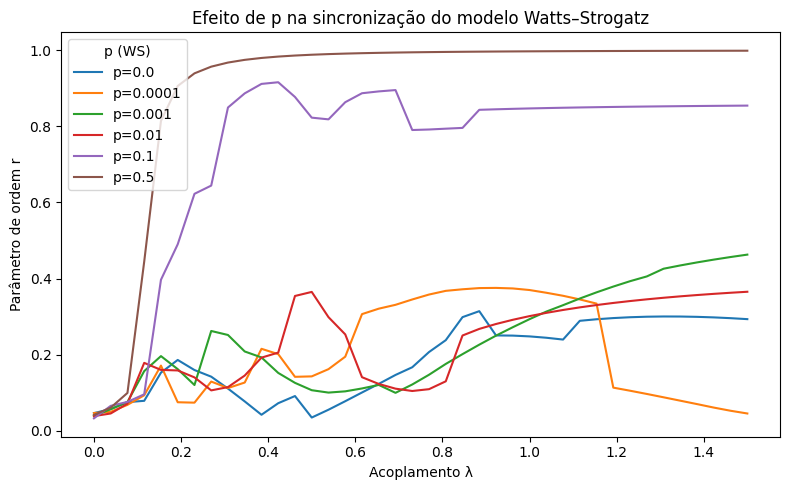

In [3]:
# Efeito de p em Watts–Strogatz
ps = [0.0, 1e-4, 1e-3, 1e-2, 0.1, 0.5]
plt.figure(figsize=(8,5))
for p in ps:
    G = nx.watts_strogatz_graph(N, avg_k, p)
    A = sp.csr_matrix(nx.to_scipy_sparse_array(G))
    r = simulate_kuramoto(A, omega, lambdas)
    plt.plot(lambdas, r, label=f'p={p}')

plt.xlabel('Acoplamento λ')
plt.ylabel('Parâmetro de ordem r')
plt.legend(title='p (WS)')
plt.title('Efeito de p na sincronização do modelo Watts–Strogatz')
plt.tight_layout()
plt.show()